Facciamo tutti gli import necessari per creazione e testing delle mappe

In [1]:
import gym
import minihack
import random
import math
from minihack import LevelGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display


Ora definiamo la funzione che serve per mostrare le mappe create

In [2]:
def render_des_file(des_file):
    env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file)

    obs = env.reset()
    env.render()
    plt.imshow(obs['pixel'][0:900, 0:900])

Ora definiamo la funzione che crea i file des del negozio, la mappa è predefinita ma gli oggetti sono generati casualmente con questa logica:  
-E' sempre presente un Healing Item (healing potion)  
-Sono presenti dai due ai cinque oggetti a destra, questi sono sempre differenti (spada e arco, arco e armatura, spada e armatura, spada e spada migliore)  
-Il costo degli oggetti dipende dagli altri rispettando questa scala : pozione->frecce->arma->armatura  
-L'arma e le frecce cambieranno l'attacco del personaggio rendendo beatable più nemici, l'armatura aumenterà la healthiness massima, la pozione curerà la healthiness senza superare il limite.  
  
-Gli oggetti disponibili sono:  
'healing' (pozione della vita)
      
-Le spade possibili sono :  
 'bullwhip'
 'stiletto'  
 'long sword',  
 'morning star'  
 'katana'  
  
-Le frecce possibili sono:   
 'orcish arrow'  
 'silver arrow'  
 'arrow'  
 'elven arrow'  
 'ya'  
  
-Le armature possibili sono :  
 'scale mail'  
 'bronze plate mail'  
 'dwarvish mithril-coat'  
 'elven mithril-coat'  
 'chain mail'  
  
Tutti gli oggetti sono ordinati dal più scarso al più forte (per i prezzi aspetta di vedere quanto droppano i nemici).

In [3]:
AVAIABLE_OBJECTS=[
'healing',
]

#Armi disponibili dalla più scarsa alla più forte
AVAIABLE_ARROWS=[
'orcish arrow',
'silver arrow',
'arrow',
'elven arrow',
'ya'
]

AVAIABLE_WEAPONS=[
'bullwhip',
'stiletto',
'long sword',
'morning star',
'katana',
]

AVAIABLE_ARMORS=[
'scale mail',
'bronze plate mail', 
'dwarvish mithril-coat',
'elven mithril-coat',
'chain mail'  
]

SYMBOLS=[
'!', #healing potion
')', #arrows
')', #weapons
'[', #armor
]

avaiableitems=['HEALING','ARROWS','WEAPON','ARMOR']


Definiamo la funzione che aggiunge un oggetto randomico (dipendente dal seed inserito) nella posizione data.  
-In livelli più alti vengono spawnate armi migliori.
-Gli oggetti offerti sono uguali ma con più qualità se sono già spawnati tutti gli item (solo caso da cinque)




In [4]:
def addobject(lvl: LevelGenerator, seed:int, posx:int ,posy:int,others: [str]):
    #se gli altri sono frecce, arma e armatura, cerco di spawnare un'altra entità di qualità differente
    levelnumber =math.floor(seed/200)
    quality=levelnumber-1
    remainingitems=['HEALING','ARROWS','WEAPON','ARMOR']
    #gestione del caso (ci sono già altri item di questo tipo nello shop)
    for i in others:
        remainingitems.pop(remainingitems.index(i))
    if remainingitems.__len__()==0:
        remainingitems=['HEALING','ARROWS','WEAPON','ARMOR']
        if levelnumber==5:
            quality=quality-1
        else: quality=quality+1
    #a questo punto in remaining items ci sono gli item che possono ancora spawnare, devo scegliere
    #in modo pseudo-casuale (dipende dal seed)
    choice=seed%remainingitems.__len__()
    choosen=remainingitems[choice]
    pos=(posx,posy)
    if choosen=='HEALING':
        choosenitem=AVAIABLE_OBJECTS[0]
        choosensymbol=SYMBOLS[0]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)

    elif choosen=='ARROWS':
        choosenitem=AVAIABLE_ARROWS[quality]
        choosensymbol=SYMBOLS[1]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy))
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy+1))
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy+2))

    elif choosen=='WEAPON':
        choosenitem=AVAIABLE_WEAPONS[quality]
        choosensymbol=SYMBOLS[2]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)

    else:
        choosenitem=AVAIABLE_ARMORS[quality]
        choosensymbol=SYMBOLS[3]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)
        
    return choosen
    

Ora definiamo la funzione che filla lo shop con oggetti randomici (dipendenti dal seed inserito).  
Livello 1: 3 (80%), 4 (15%) 5 (5%)  
Livello 2: 3 (50%), 4 (40%) 5 (10%)  
Livello 3: 3 (30%), 4 (50%) 5 (20%)  
Livello 4: 3 (20%), 4 (30%) 5 (50%)  
Livello 5: 3 (5%), 4 (15%) 5 (80%)  


In [27]:

def fillwithobj(lvl: LevelGenerator,seed: int):
    random.seed(seed)
    levelnumber=math.floor(seed/200)

    if levelnumber==1:
        if seed<=360:
            numitem=3
        elif seed<=390:
            numitem=4
        else: 
            numitem=5

    elif levelnumber==2:
        if seed<=500:
            numitem=3
        elif seed<=580:
            numitem=4
        else: 
            numitem=5

    if levelnumber==3:
        if seed<=660:
            numitem=3
        elif seed<=760:
            numitem=4
        else: 
            numitem=5

    if levelnumber==4:
        if seed<=840:
            numitem=3
        elif seed<=900:
            numitem=4
        else: 
            numitem=5

    if levelnumber==5:
        if seed<=1010:
            numitem=3
        elif seed<=1040:
            numitem=4
        else: 
            numitem=5
    others=[]
    numitem=random.randint(3,5)
    #STARTING ITEMS
    if levelnumber==1:
        lvl.add_object(name='bow',symbol=')',place=(2,6)) #METTI ARCO
        lvl.add_object(name='worm tooth',symbol=')',place=(2,5)) #METTI ARMA INIZIALE
        
    if numitem==3:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(4,3))
        else:
            others.append(addobject(lvl,seed,4,3,others))
        others.append(addobject(lvl,seed,6,3,others))
        others.append(addobject(lvl,seed,8,3,others))

    elif numitem==4:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(3,3))
        else:
            others.append(addobject(lvl,seed,3,3,others))
        others.append(addobject(lvl,seed,5,3,others))
        others.append(addobject(lvl,seed,7,3,others))
        others.append(addobject(lvl,seed,9,3,others))

    elif numitem==5:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(2,3))
        else:
            others.append(addobject(lvl,seed,2,3,others))
        others.append(addobject(lvl,seed,4,3,others))
        others.append(addobject(lvl,seed,6,3,others))
        others.append(addobject(lvl,seed,8,3,others))
        others.append(addobject(lvl,seed,10,3,others))





Infine definiamo la funzione che crea il file des del negozio e lo mostra a schermo.  
Il levelnumber serve per la generazione di livelli dipendenti dal piano a cui è arrivato il personaggio:  
piani più alti->oggetti migliori nello shop e più scelte possibili (probabilità aumentata)


MAZE: "mylevel", ' '
FLAGS:premapped
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
||||||||||||||||  
|..............|  
|...........||||  
|...........|     
|...........|     
|...........|     
|...........|     
|||||||||||||     
ENDMAP
REGION:(0,0,18,8),lit,"ordinary"
#LEVEL: 1
#SEED: 300
BRANCH:(1,6,1,6),(0,5,0,5)
MONSTER:"shopkeeper",(6, 1)
DOOR:closed,(12, 1)
PORTAL:(14,1,14,1), (2,2,2,2),"mylevel"
OBJECT:(')',"bow"),(2, 6)
OBJECT:(')',"worm tooth"),(2, 5)
OBJECT:('!',"healing"),(2, 3)
OBJECT:(')',"orcish arrow"),(4, 3)
OBJECT:(')',"orcish arrow"),(4, 4)
OBJECT:(')',"orcish arrow"),(4, 5)
OBJECT:(')',"bullwhip"),(6, 3)
OBJECT:('[',"scale mail"),(8, 3)
OBJECT:('!',"healing"),(10, 3)
GOLD: 15,(1, 5)


Konnichi wa Agent, welcome to NetHack!  You are a lawful male human Samurai.    
                                                                                
                                                                                
                                 

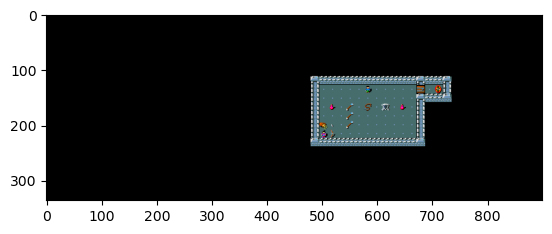

In [33]:




def creashop(levelnumber,startingseed):
    map="""||||||||||||||||
|..............|
|...........||||
|...........|    
|...........|    
|...........|   
|...........|     
|||||||||||||"""
    seed=startingseed+200*levelnumber
    lvl=LevelGenerator(map=map,lit=True,flags=['premapped'])
    lvl.add_line("#LEVEL: "+str(levelnumber))
    lvl.add_line("#SEED: "+str(seed))
    lvl.set_start_pos((1,6))
    lvl.add_monster(name='shopkeeper',place=(6,1))
    lvl.add_door("closed", place=(12,1))
    lvl.add_line("PORTAL:(14,1,14,1), (2,2,2,2),\"mylevel\"")
    fillwithobj(lvl,seed)
    if levelnumber==1:
        startinggold=15 #METTI SOLDI INIZIALI (DA VEDERE ANCORA QUANTI)
        lvl.add_line("GOLD: "+str(startinggold)+",(1, 5)") #PRIMA AMOUNT POI COORDINATE
    
    return lvl.get_des()
#il starting seed va definito in questo modo (un numero da 0 a 200), 
#stesso seed -> stessa serie di livelli    
startingseed=random.randint(0,200)
#questa funzione restituisce il file des valido dello shop
#CAMBIARE LEVELNUMBER PER UN LIVELLO DIVERSO
levelnumber=1
shop=creashop(levelnumber,startingseed)
print(shop)
render_des_file(shop)